In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886010401PNS003SRSPEC0003.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.185e-03 +/- 7.273e-04 (80.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.699e+04 sec
 Using fit statistic: chi
 Using Background File                P0886010401PNS003BGSPEC0003.FTZ
  Background Exposure Time: 1.699e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY8.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886010401PNS003SRCARF0003.FTZ



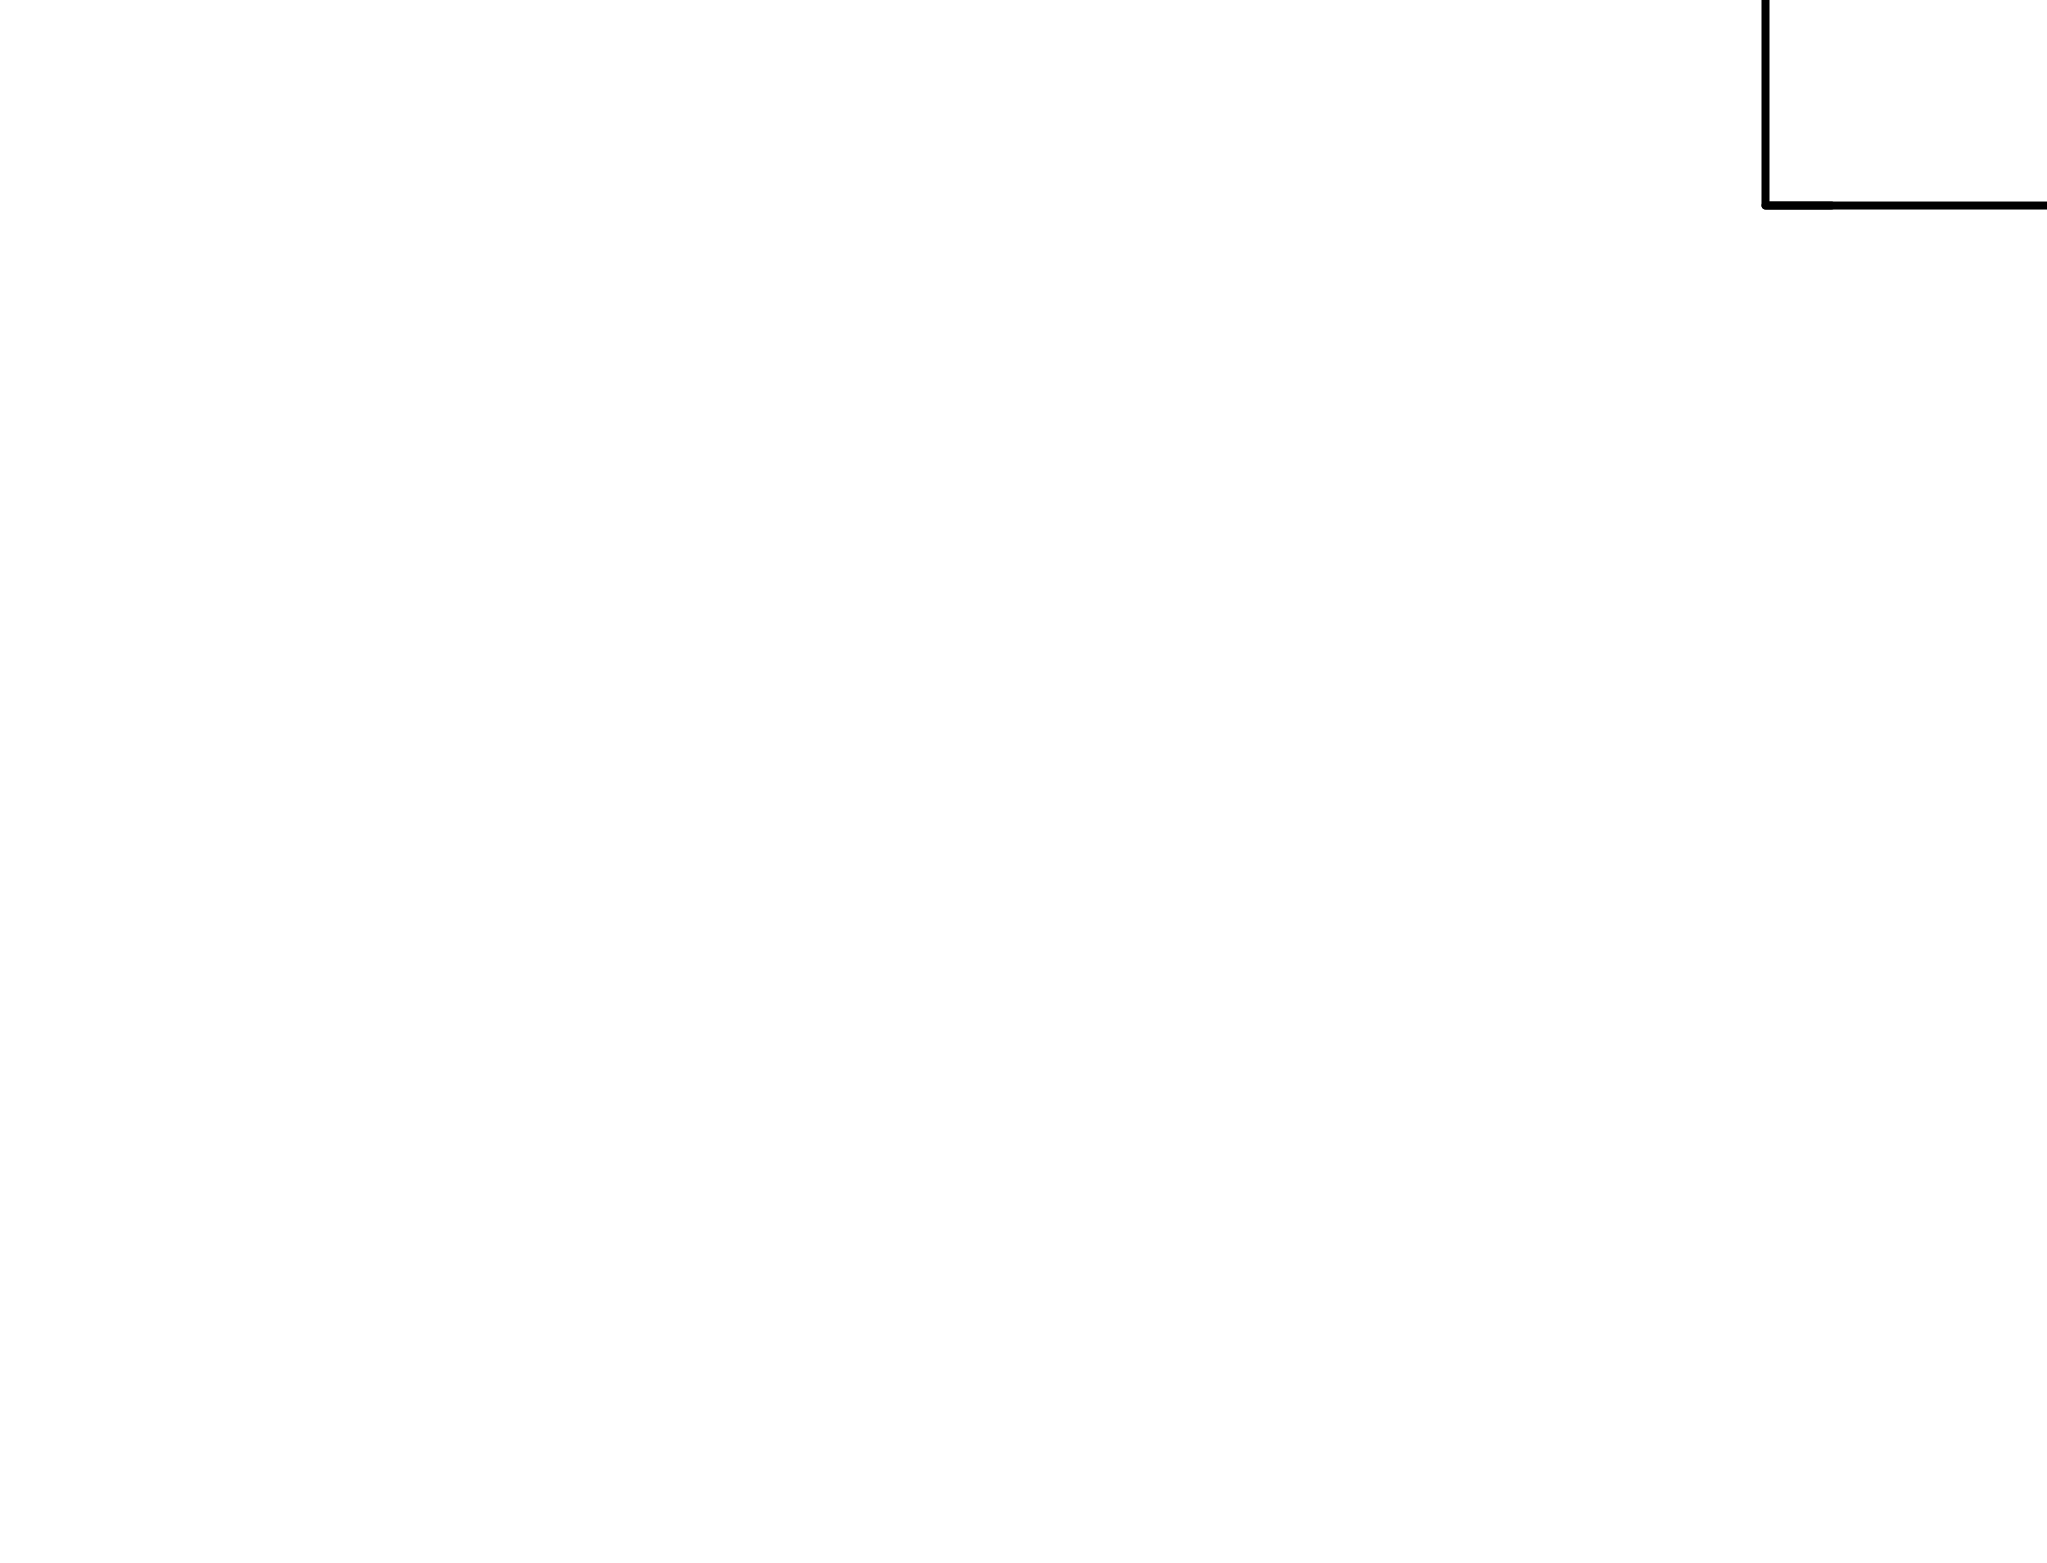

      No channels ignored (no channels in specified range)
     1 channels (7) ignored in spectrum #     1



In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              5.957302e+11     using 6 bins.



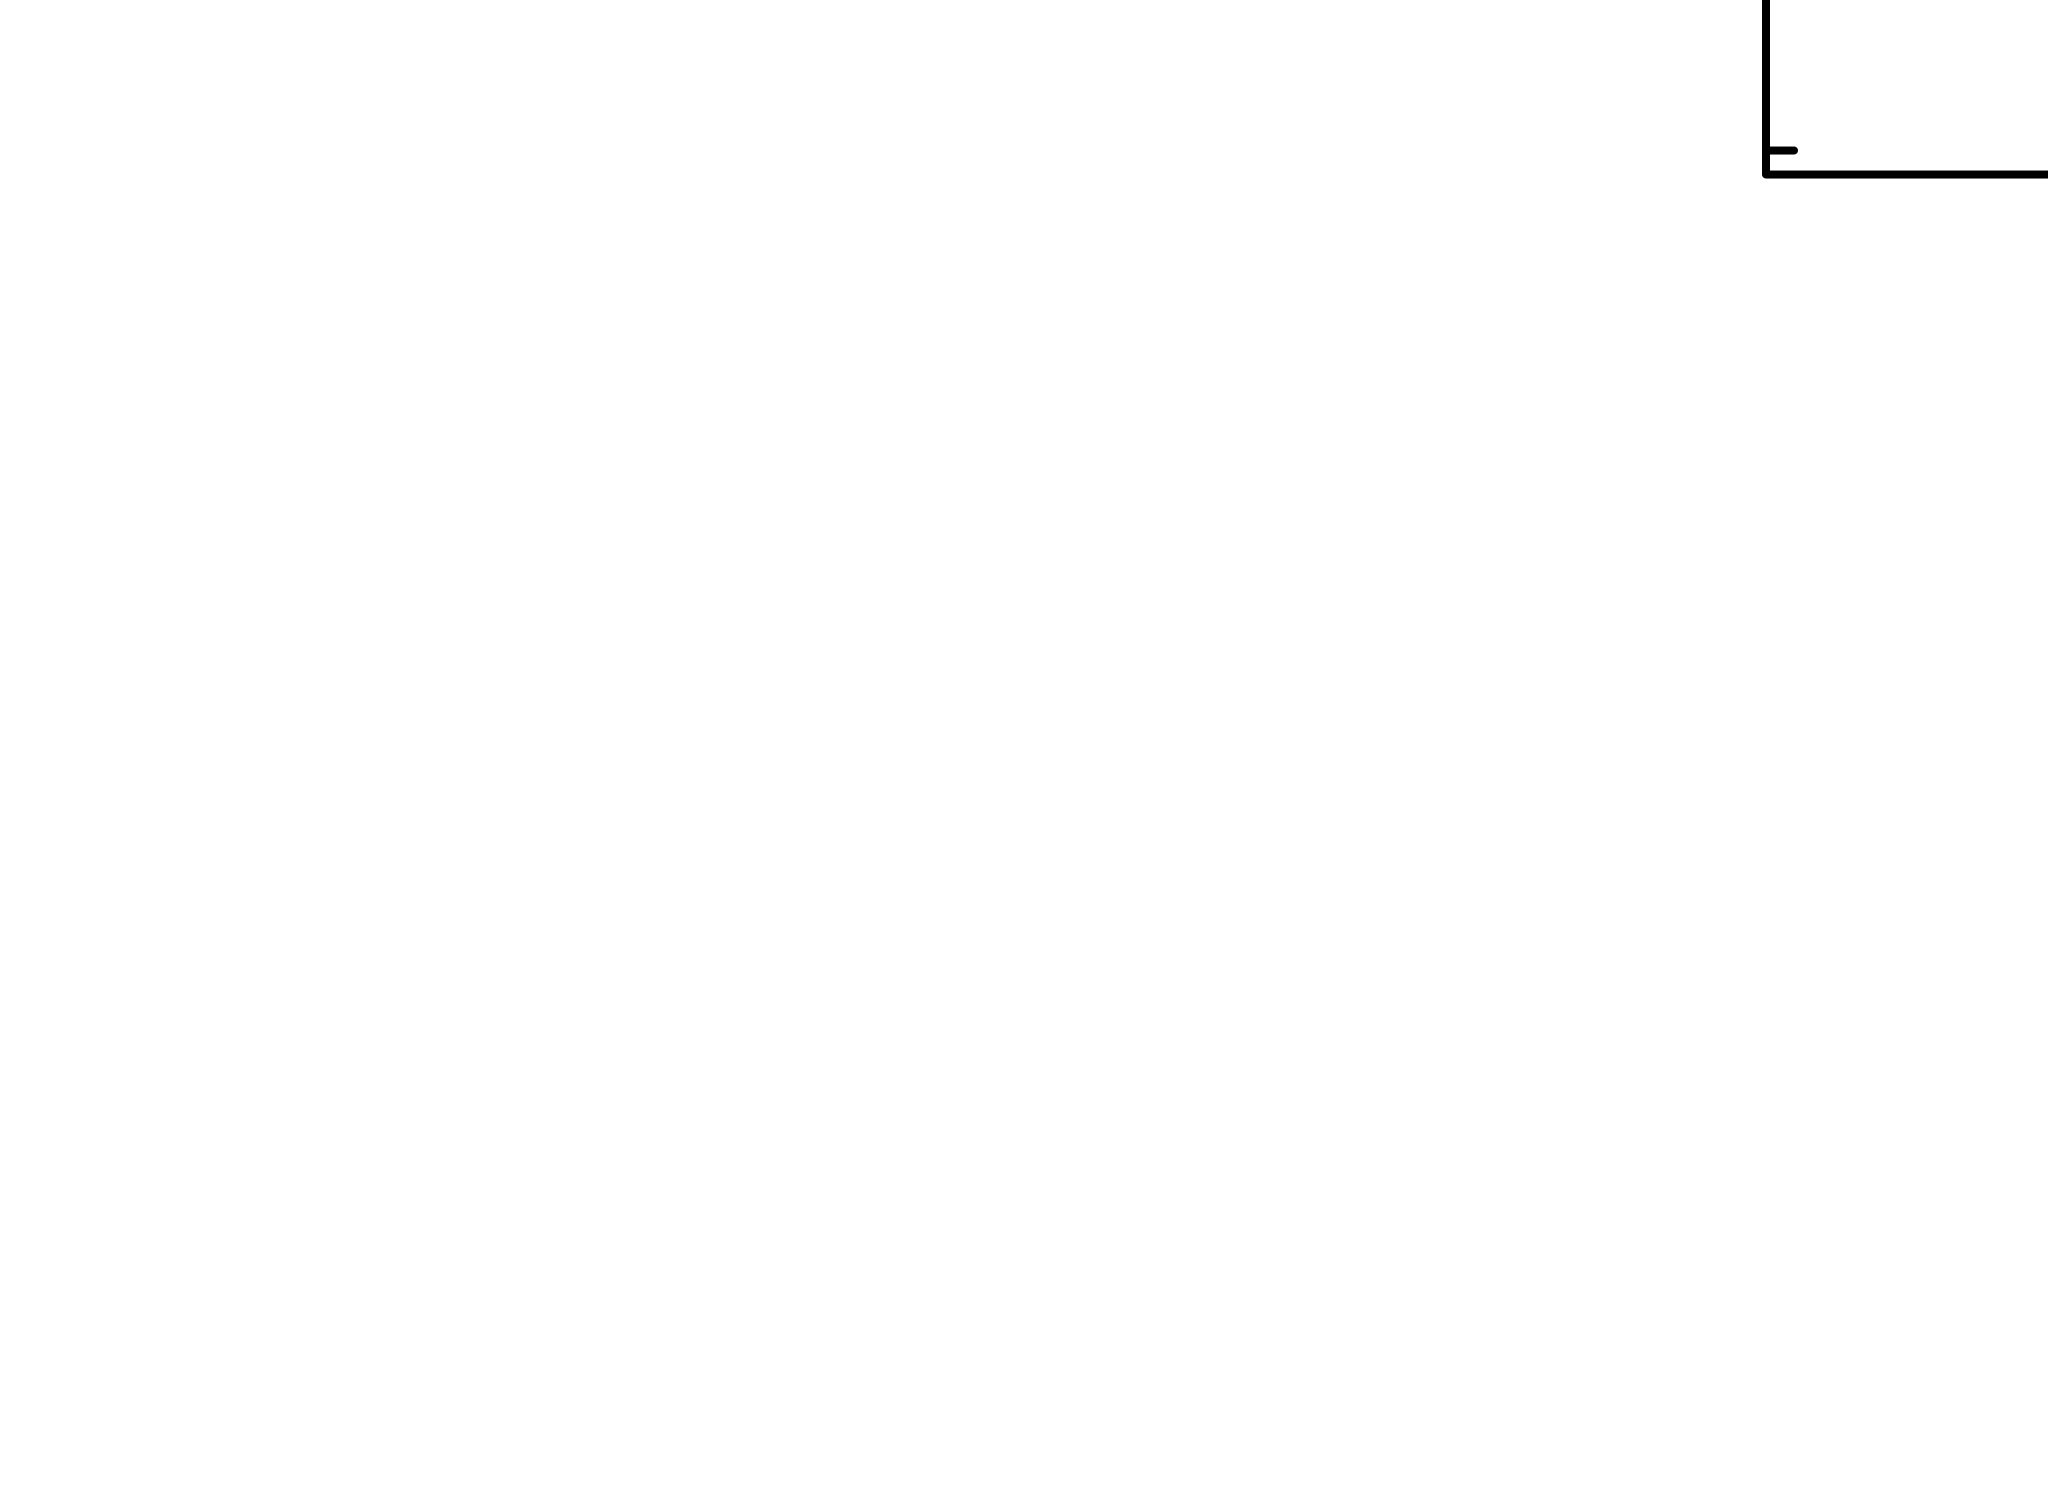

In [3]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [4]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
     1      1.13408      12.3586    (-3.35459,7.86993)
 Parameter   Confidence Range (2.706)
     2     0.422017      4.61919    (-1.56836,2.62881)


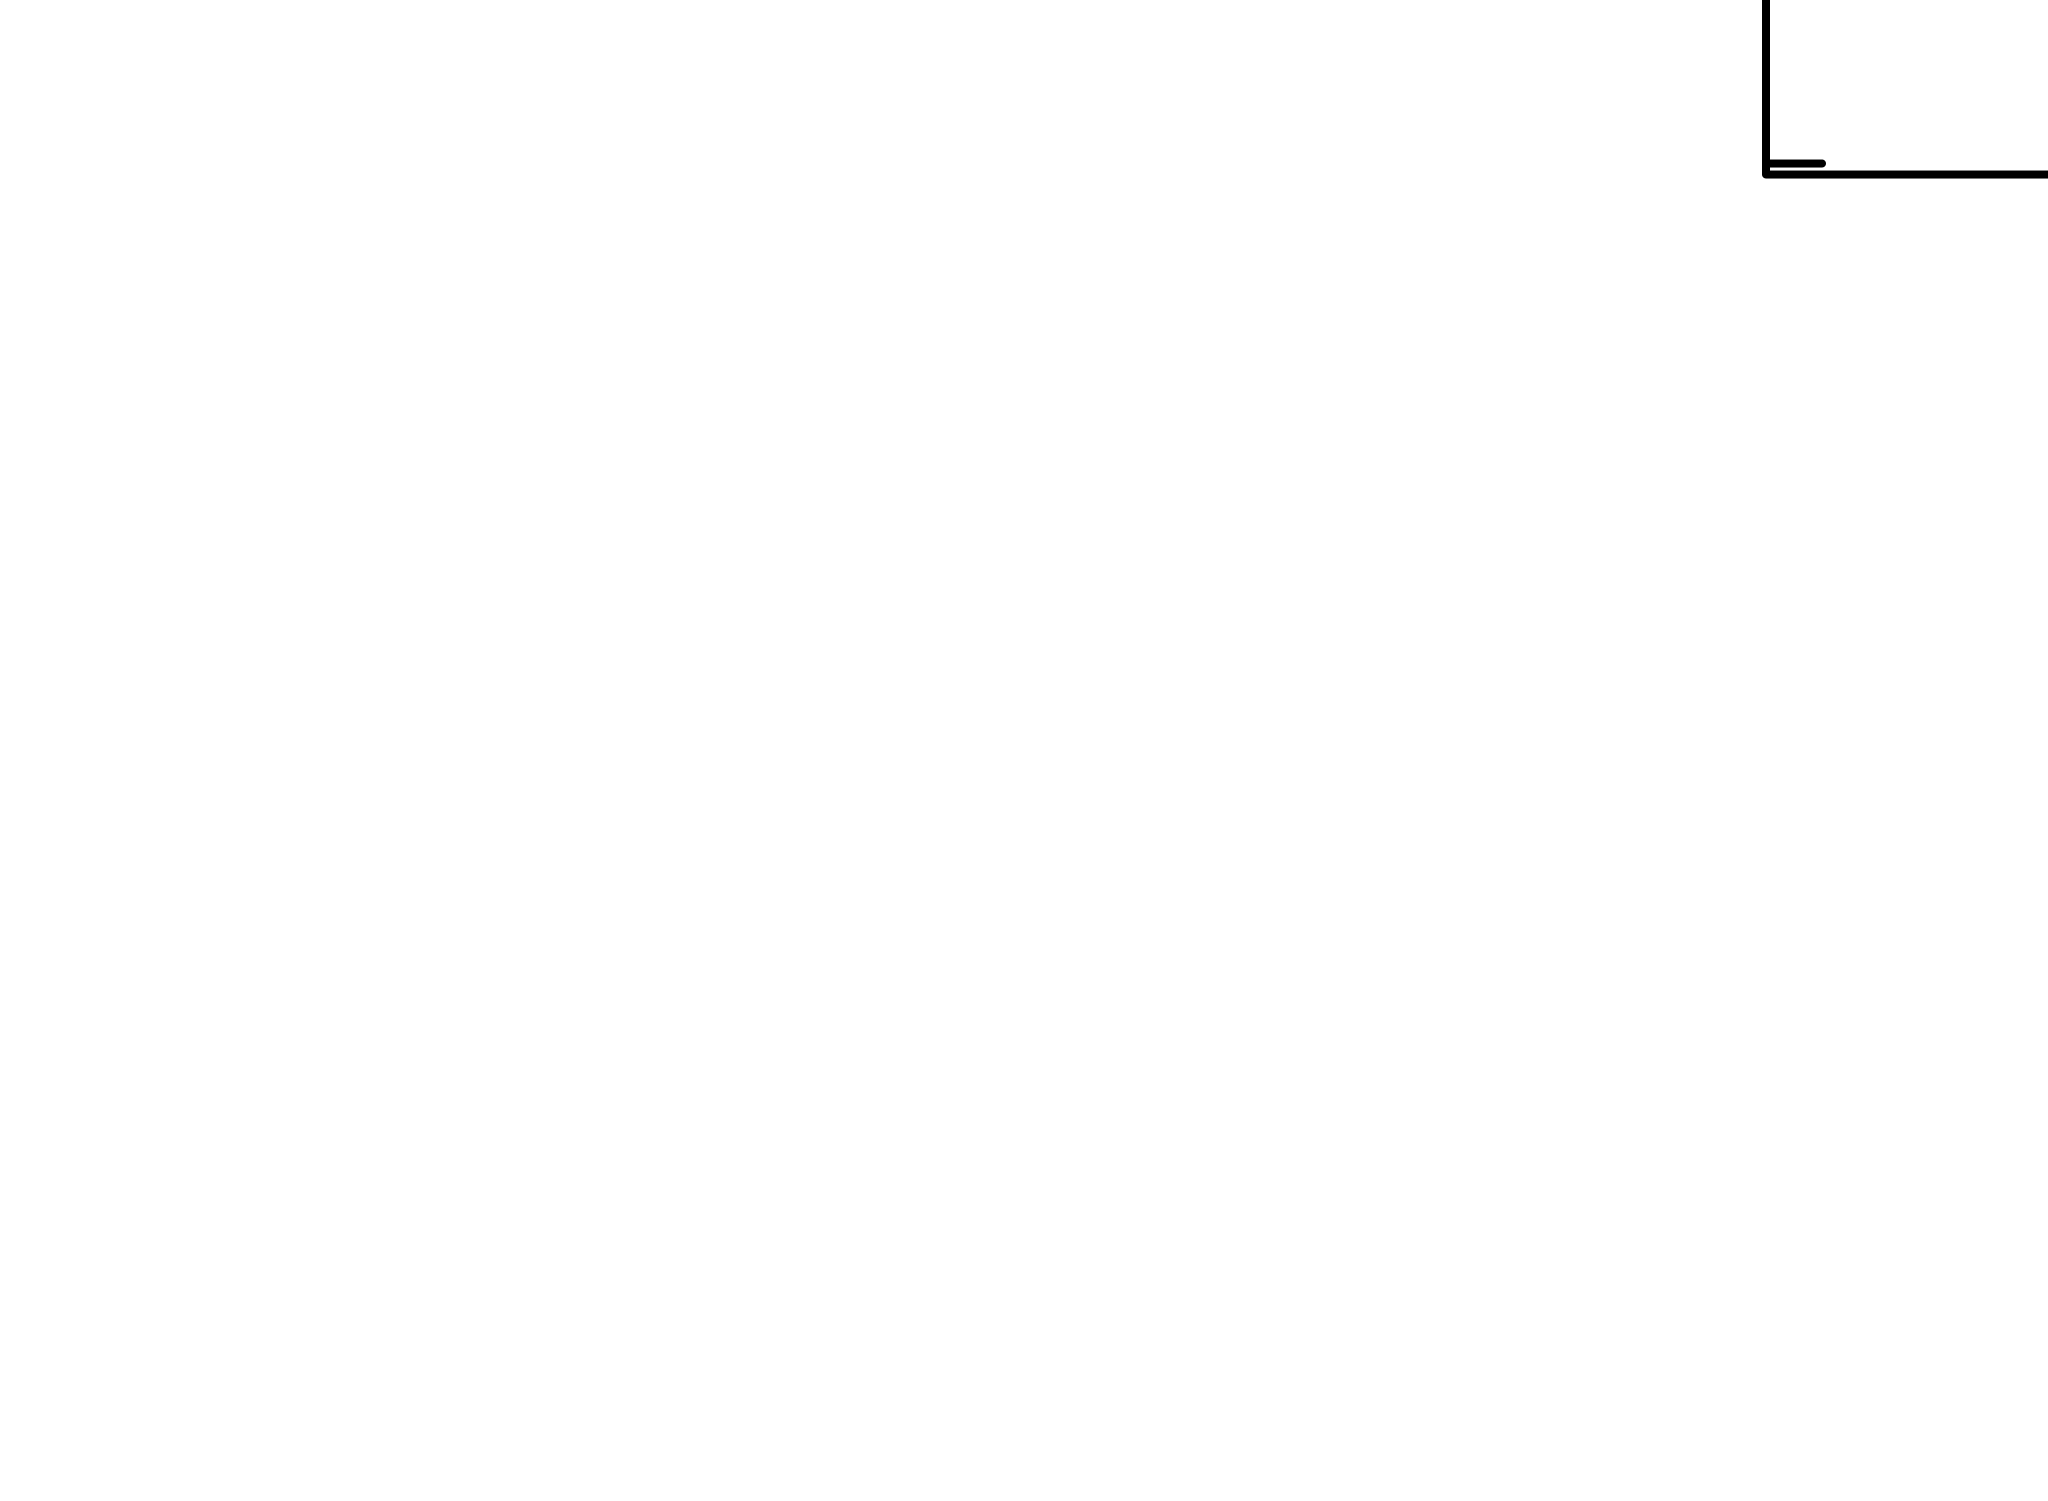


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.291863e+11     using 6 bins.

Test statistic : Chi-Squared              1.291863e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
24.9695      4.91962      -1       1.33027       29.4065   1.77214e-05
10.3241      307129       -2       2.35230       198.416   4.62403e-05
5.60785      113410       -2       2.79564       28.1298   5.30716e-05
3.9

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [6]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
     1      1.83023      9.61135    (-2.35238,5.42874)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 200, with delta statistic: 0.5849

Continue error search in this direction? 
*** Parameter upper bound is INVALID.

     2      1.51752            0    (-4.78309,-6.30061)



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              5.713082e+10     using 6 bins.

Test statistic : Chi-Squared              5.713082e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
67.4146      2.23403      -3      0.415787       22.9282   6.8

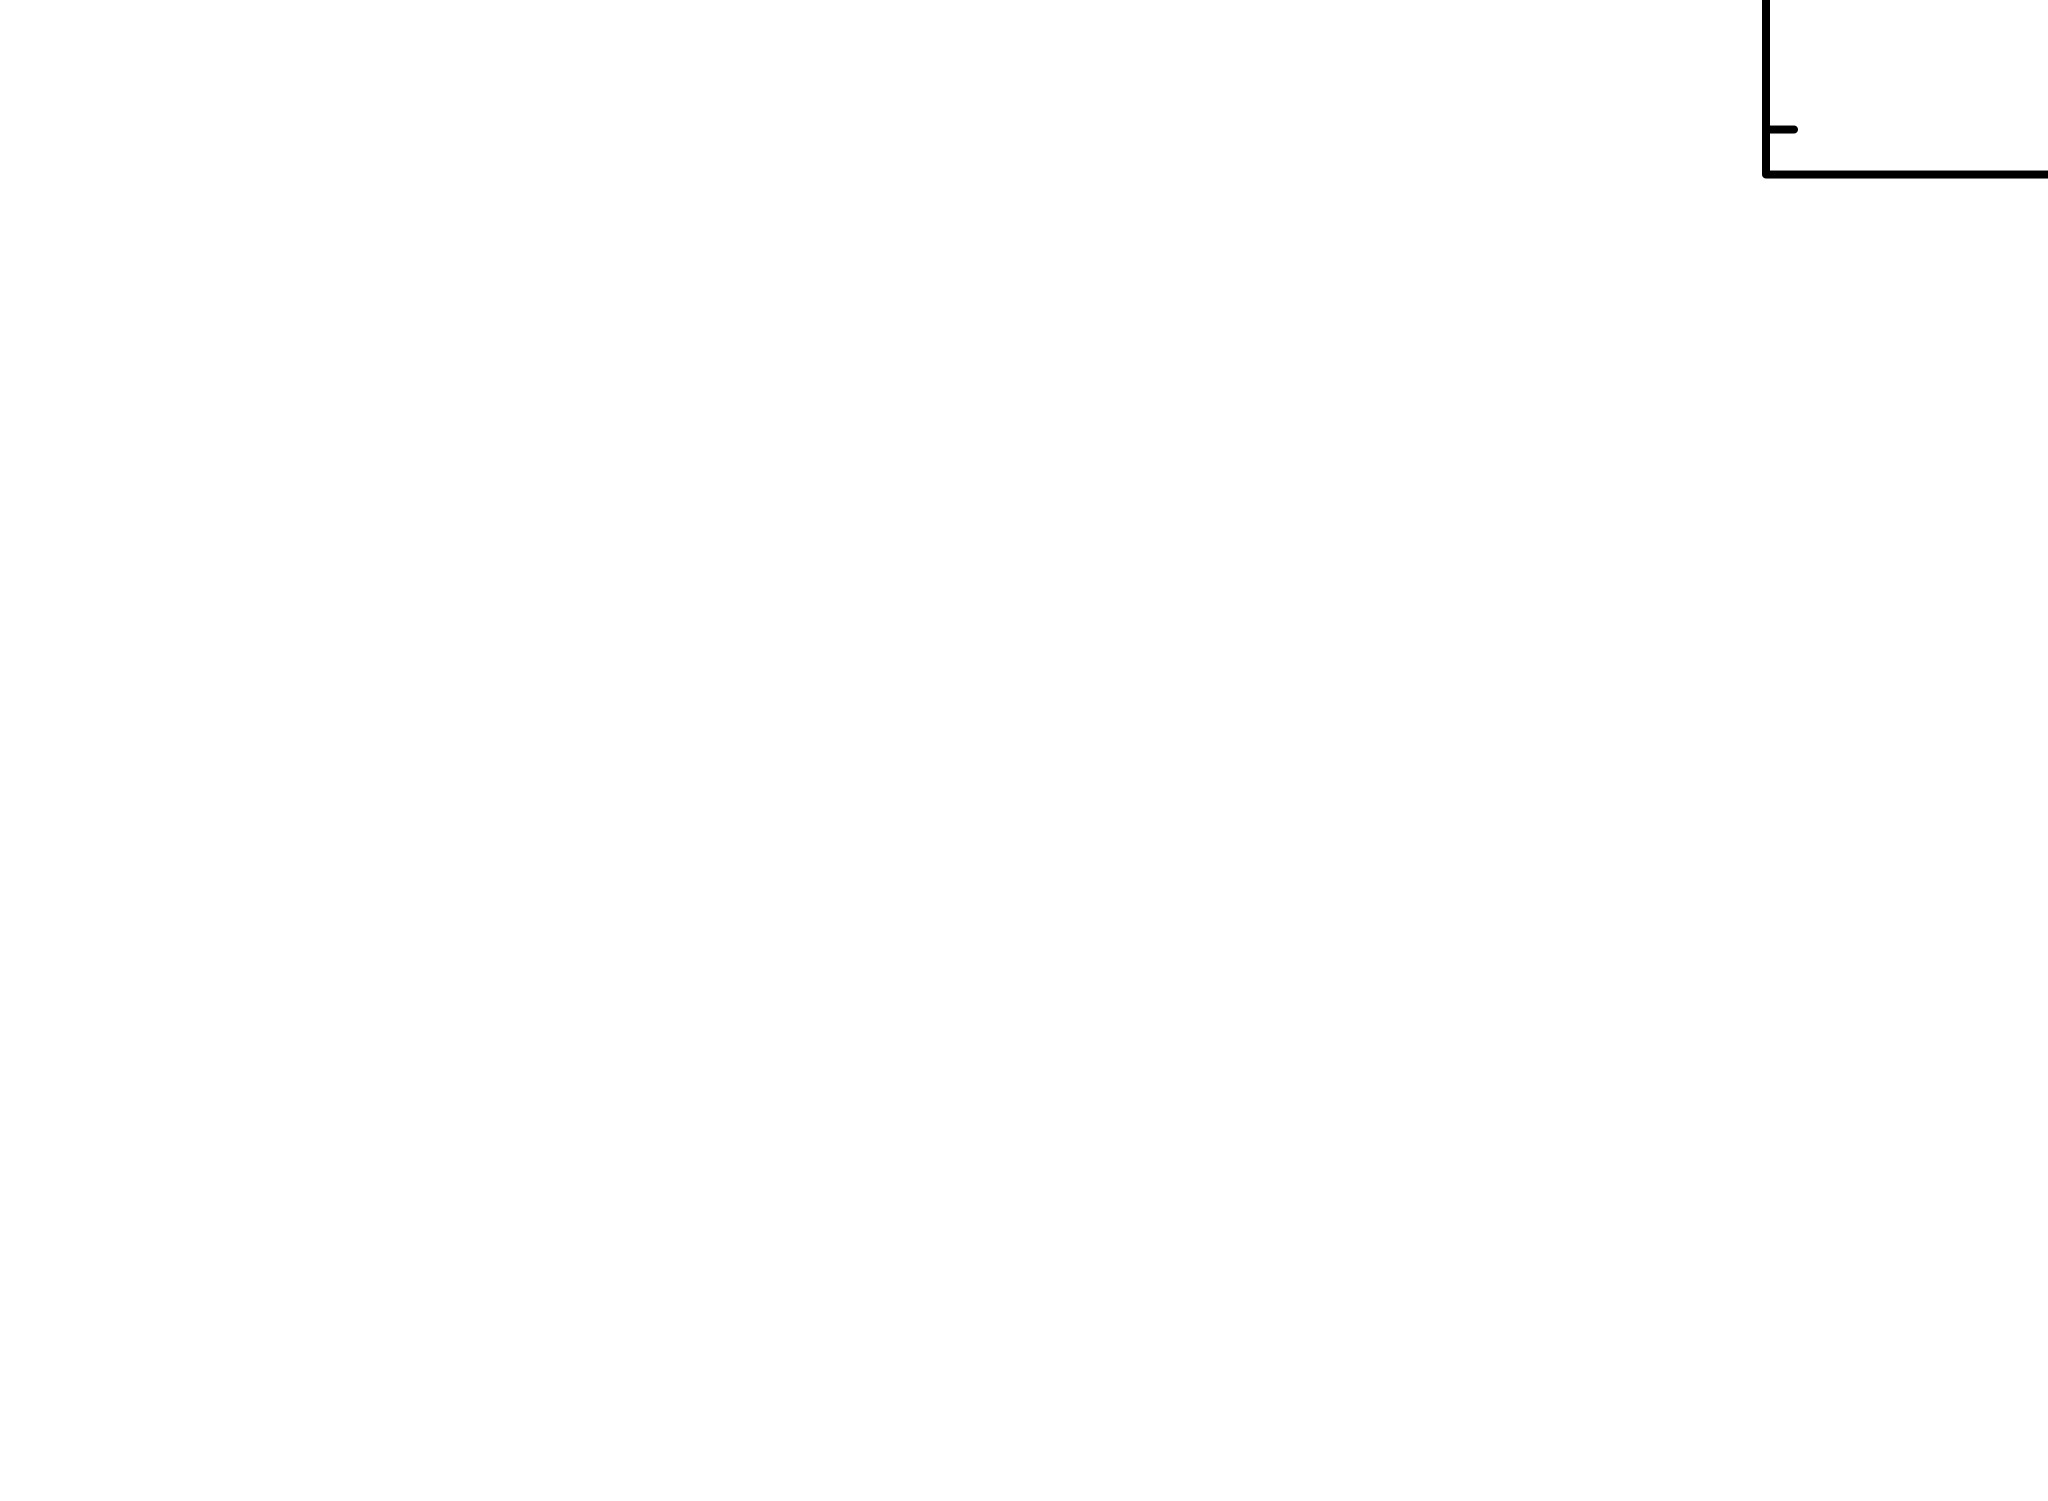

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [8]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
3.57219      0.0341161    -2       3.86639       7.09690   0.000154101
3.54899      2704.77      -3       4.09374       6.13348   0.000166762
3.53618      1330.8       -4       3.99928       6.89012   0.000160369
3.53429      611.116      -1       4.01922       6.66915   0.000162391
3.5331       344.831      -2       4.04635       6.62352   0.000163678
3.53272      17.215       -3       4.07421       6.49559   0.000165164
3.53268      10.5029      -1       4.07810       6.48728   0.000165310
 Variances and Principal Axes
                 1        2        5  
 3.4593E-10| -0.0000   0.0000   1.0000  
 6.7182E-01|  0.9840   0.1782   0.0000  
 8.9609E+01| -0.1782   0.9840  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   3.495e+00  -1.559e+01   1.838e-04
  -1.559e+01   8.679

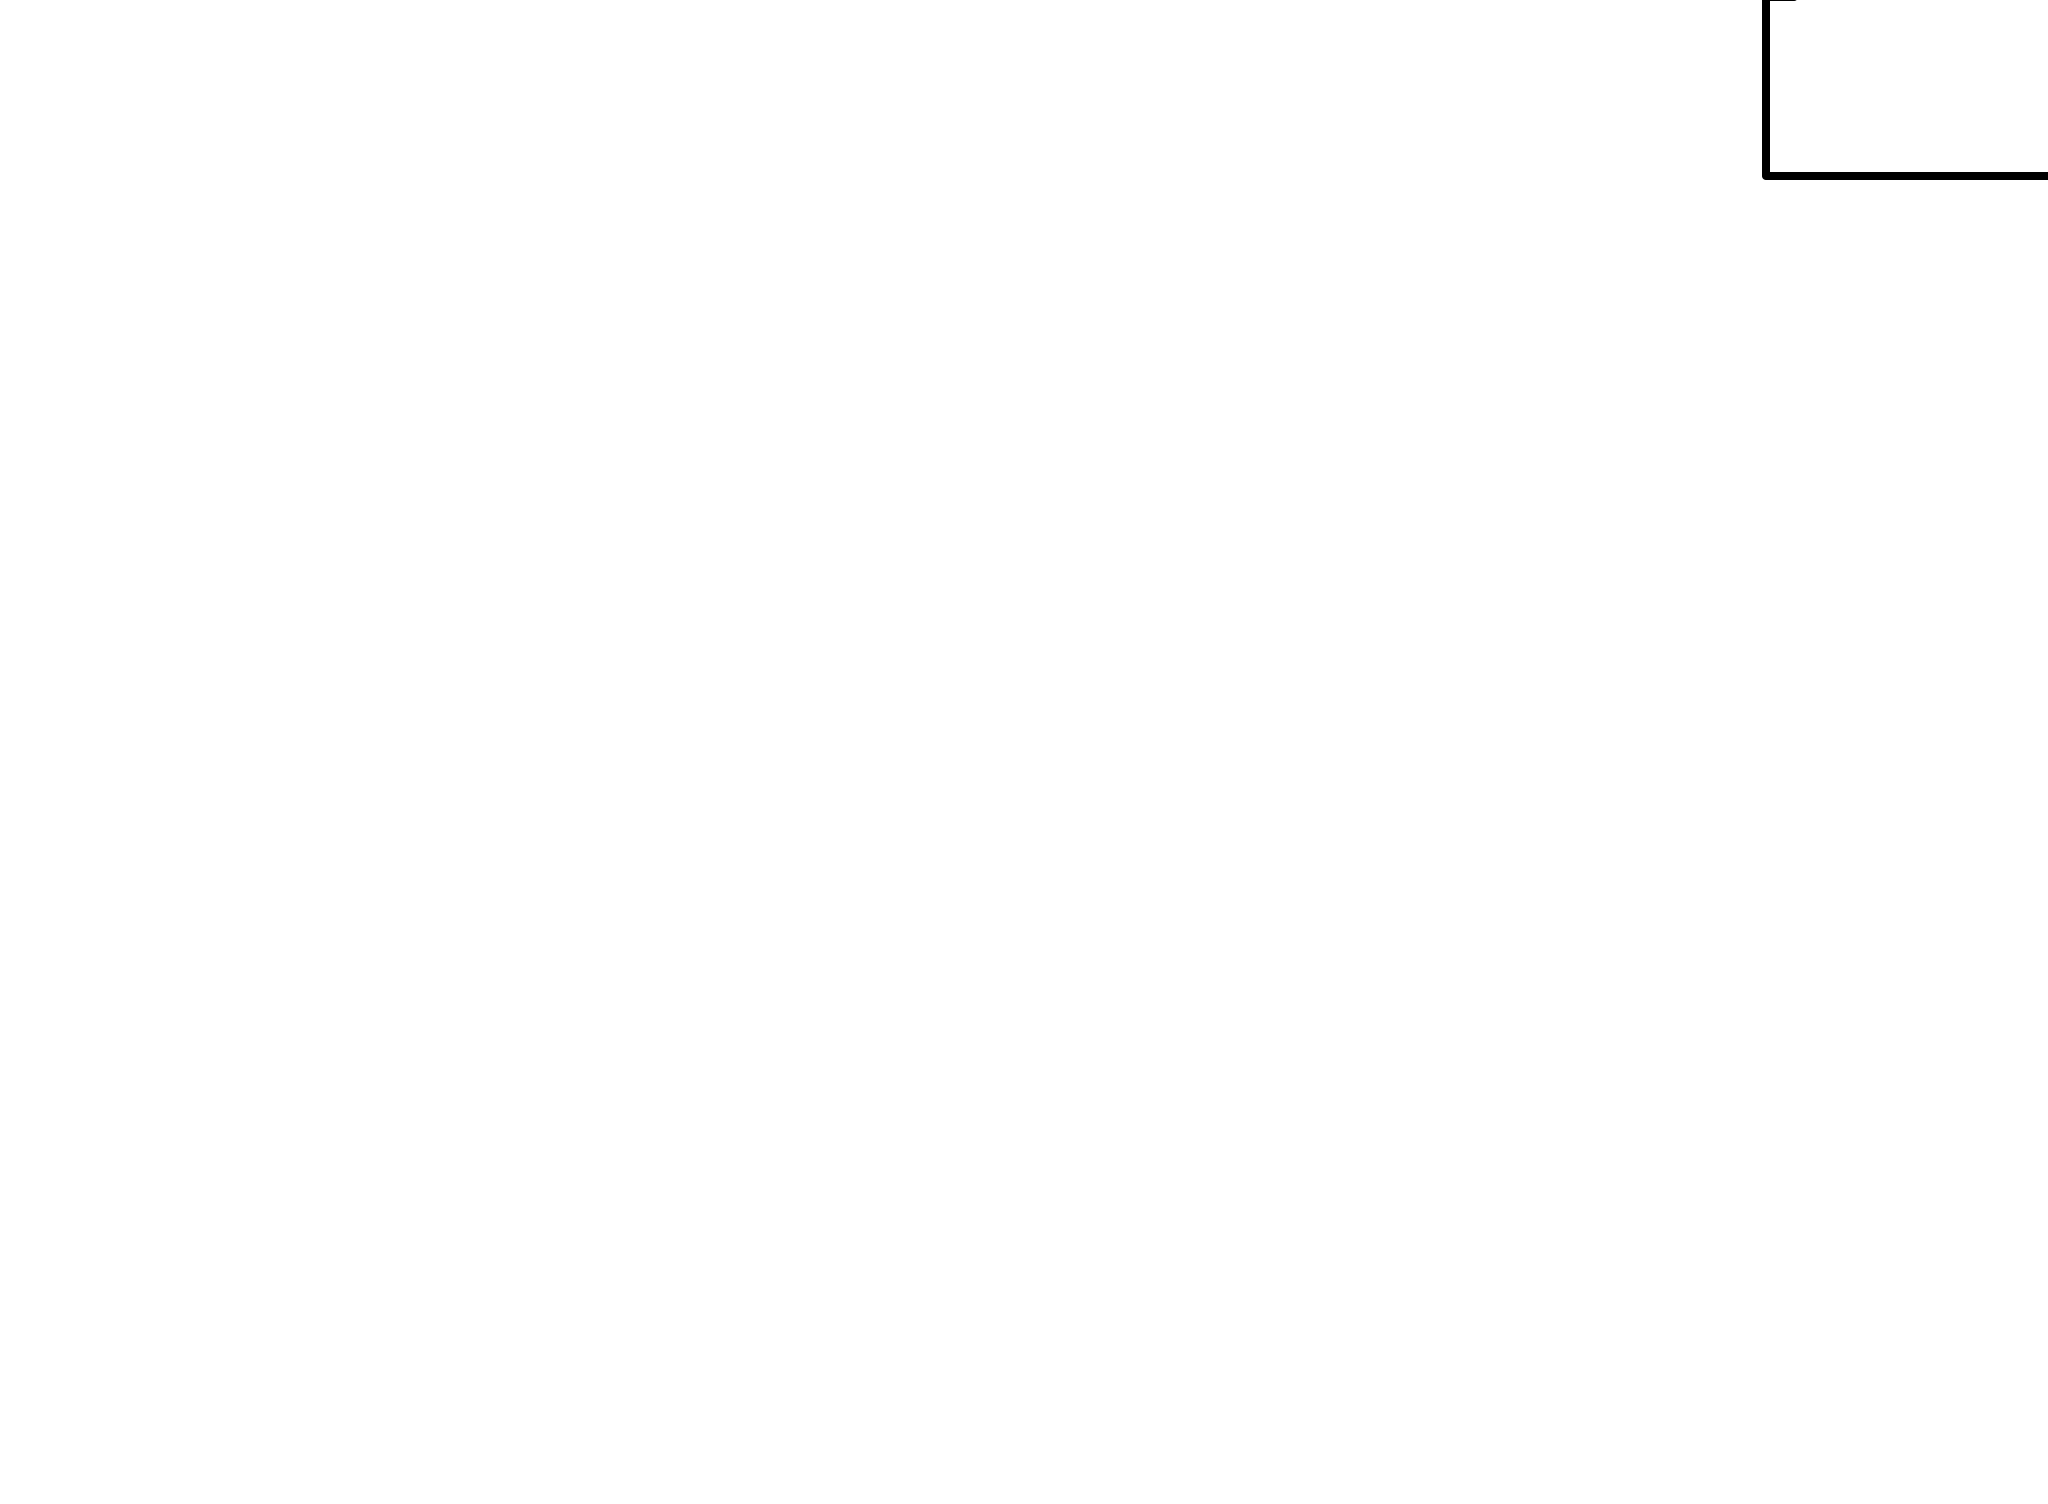


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.880929e+12     using 6 bins.

Test statistic : Chi-Squared              1.880929e+12     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
9.40912      1.13739      -1      0.357404       2.89337   4.98419e-06
8.23152      290651       -1      0.342961       2.64123   4.44711e-06
7.47369      32430.5      -1      0.427632       2.43822   3.86359e-06
6.63

In [9]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [10]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
     1     0.483025      6.38522    (-1.57586,4.32634)
 Parameter   Confidence Range (2.706)
     2     0.768225      1.96701    (-0.436208,0.76258)


In [11]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.7766e-05 photons (1.2216e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [12]:
#plx = 1.4843
d_kpc = 8
F_x = 1.2217*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

9.352463688869887e+32


In [13]:
import numpy as np
print(np.log10(L_x))

32.97092603071638


In [14]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.3457752748071123



Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.287046e+12     using 6 bins.

Test statistic : Chi-Squared              4.287046e+12     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              6.026542e+13     using 6 bins.

Test statistic : Chi-Squared              6.026542e+13     using 6 bins.
 Null hypothesis prob

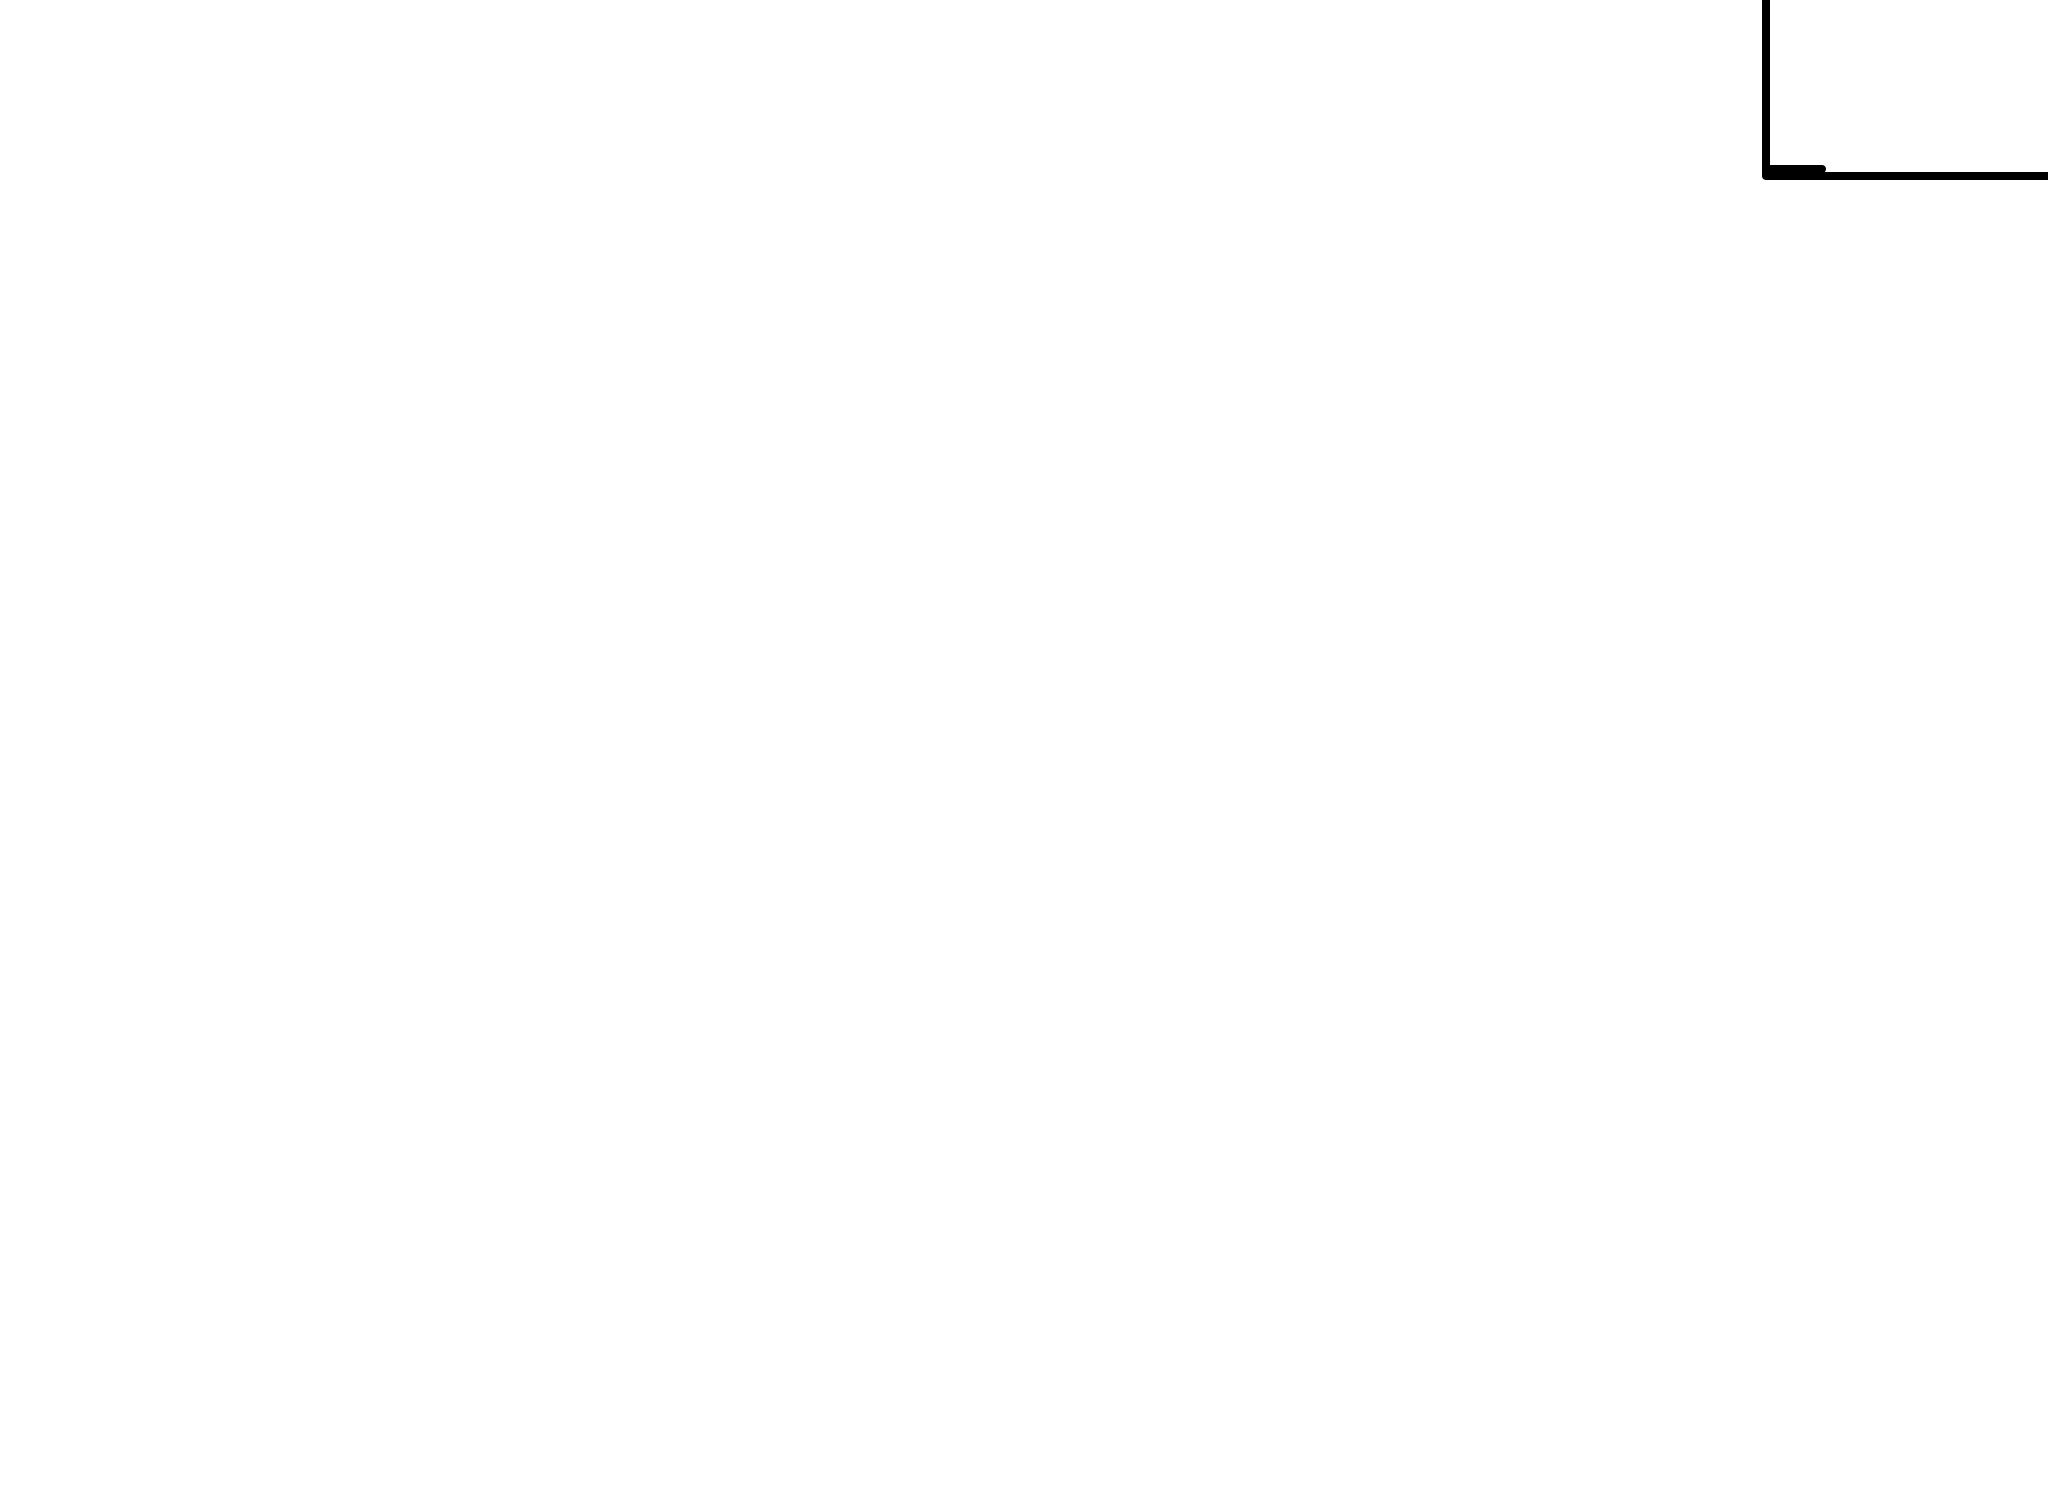

In [15]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
mo.bbody.kT = 1.0
mo.powerlaw.PhoIndex = 2.5
Fit.perform()
Plot("data resid")